In [1]:


import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
from datetime import datetime
import os
from thermal_lib import *
from tqdm import tqdm
import pingouin as pg

def plot_avg(var, isDay, draw_sub=True, draw_sem = True, draw_zero = False, ax=None, color='b'):

    if ax is None:
        fig, ax = plt.subplots(figsize=(6,4))

    if draw_zero:
        ax.axhline(0,color='k',linestyle='--')

    if draw_sub:
        for c in var.columns:
            ax.plot(var.index, var[c],color,alpha=.1)

    avg = var.mean(axis=1) 

    if draw_sem:
        sem = var.sem(axis=1) 
        ax.fill_between(var.index, avg+sem, avg-sem, alpha=.3, color=color,edgecolor='none')

    ax.plot(var.index, avg,color,alpha=1)
    xlims = [var.index[0], var.index[-1]]
    ax.set_xlim(xlims)
    ylims = ax.get_ylim()
    ax.fill_between(var.index, y1=ylims[0], y2=ylims[1], where=isDay<1,alpha=.2, color='gray',edgecolor='none')
    ax.set_ylim(ylims)
    #ax.set_xlabel('Time [Hours]')
    
def plot_raw(data=None, y=None, x=None, isDay=None, ax=None, hzero=True):
    
    if ax is None:
        fig,ax = plt.subplots(figsize=(8,3))

    if x is None:
        x = data.index
    
    if hzero:
        ax.axhline(0,color='k',linestyle='--')
    
    ax.plot(x, data[y] )
    ax.set_ylim([data[y].min()*1.1, data[y].max()*1.1 ])
    ylims = ax.get_ylim()
    ax.fill_between(x, where=data['isDay']==0, 
                    y1=ylims[0], 
                    y2=ylims[1], 
                    color='gray', alpha=.2, edgecolor='None' )

    ax.set_xlim([x[0], x[-1]])
    return ax

    
%matplotlib notebook

/home/oldboy/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/oldboy/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:

#pth = r'D:\thermography\cdkl5_thermal_behaviour_group1\unico'
pth = None
sub = Subjects(pth)
print(sub)

Number of Subjects: 16

0 -> ID: WT_74 RECs: 3
1 -> ID: WT_91 RECs: 3
2 -> ID: WT_97 RECs: 3
3 -> ID: KO_70 RECs: 3
4 -> ID: KO_72 RECs: 3
5 -> ID: KO_99 RECs: 3
6 -> ID: WT_86 RECs: 3
7 -> ID: WT_83 RECs: 3
8 -> ID: KO_87 RECs: 3
9 -> ID: WT_79 RECs: 3
10 -> ID: KO_69 RECs: 3
11 -> ID: KO_1021 RECs: 3
12 -> ID: KO_77 RECs: 3
13 -> ID: WT_71 RECs: 3
14 -> ID: WT_81 RECs: 3
15 -> ID: KO_75 RECs: 3



In [48]:
data_min = sub.get_data(4)
data_min.head()

,minute,day,hour,RT,isDay,temp_avg,temp_med,temp_max,centroid_x,centroid_y,distance,temp_rt_diff,temp_norm,RT_norm,temp_rt_corrected
0,600,1,10.0,22.767540,1.0,26.428678,26.428678,28.538199,22.984681,95.194503,0.047538,3.661139,-0.512474,-0.763765,0.251291
1,601,1,10.0,22.778060,1.0,26.506938,26.544801,28.610038,22.958836,96.256692,0.048795,3.728878,-0.434215,-0.753244,0.319030
2,602,1,10.0,22.782440,1.0,26.585197,26.585197,28.730048,22.971080,96.399162,0.012221,3.802757,-0.355955,-0.748865,0.392910
3,603,1,10.0,22.791857,1.0,26.592047,26.592047,28.775424,22.977487,96.362753,0.033144,3.800190,-0.349106,-0.739448,0.390342
4,604,1,10.0,22.801274,1.0,26.587475,26.587475,28.728713,22.969006,95.854830,0.281986,3.786201,-0.353677,-0.730030,0.376353


<IPython.core.display.Javascript object>


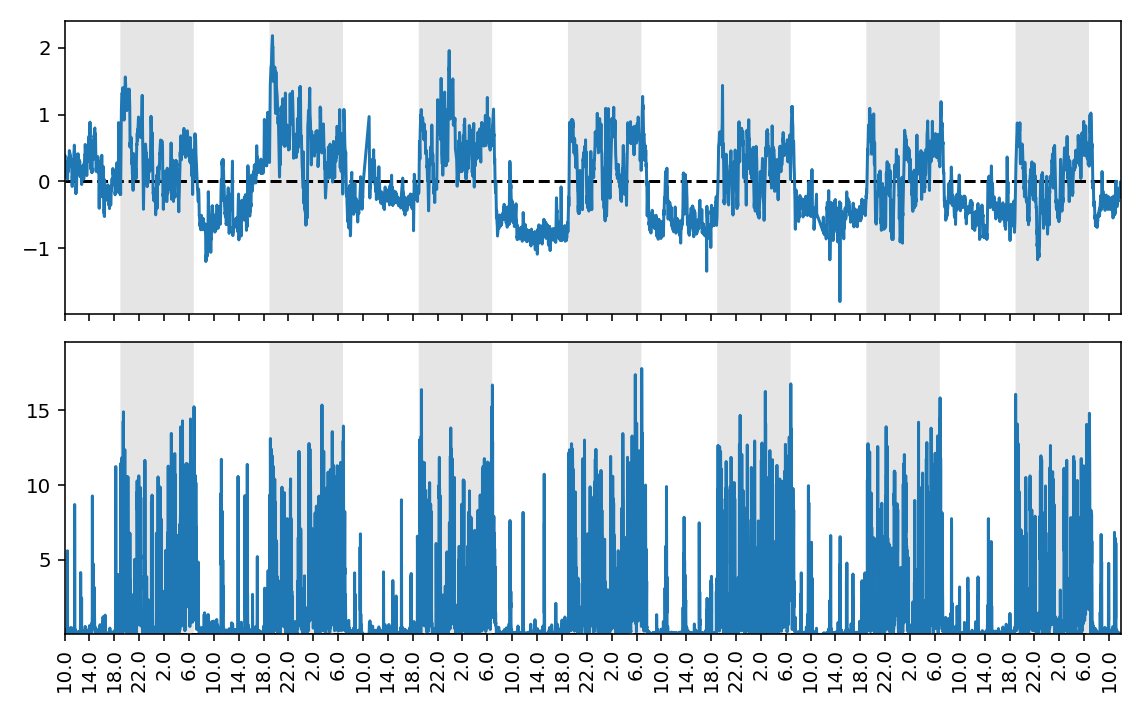

In [49]:


fig,ax = plt.subplots(2,1,figsize=(8,5),sharex=True )
plot_raw(data=data_min, y='temp_rt_corrected',ax=ax[0])
ax[0].grid(False)
ax[0].set_xticks(ticks=np.array(range(0,data_min.index[-1], 240)), labels=data_min.loc[range(0,data_min.index[-1], 240),'hour'], rotation=90 )
plot_raw(data=data_min, y='distance',ax=ax[1]) 
ax[1].set_xticks(np.array(range(0,data_min.index[-1], 240)), data_min.loc[range(0,data_min.index[-1], 240),'hour'], rotation=90  )
ax[1].grid(False)
plt.tight_layout()  





<IPython.core.display.Javascript object>


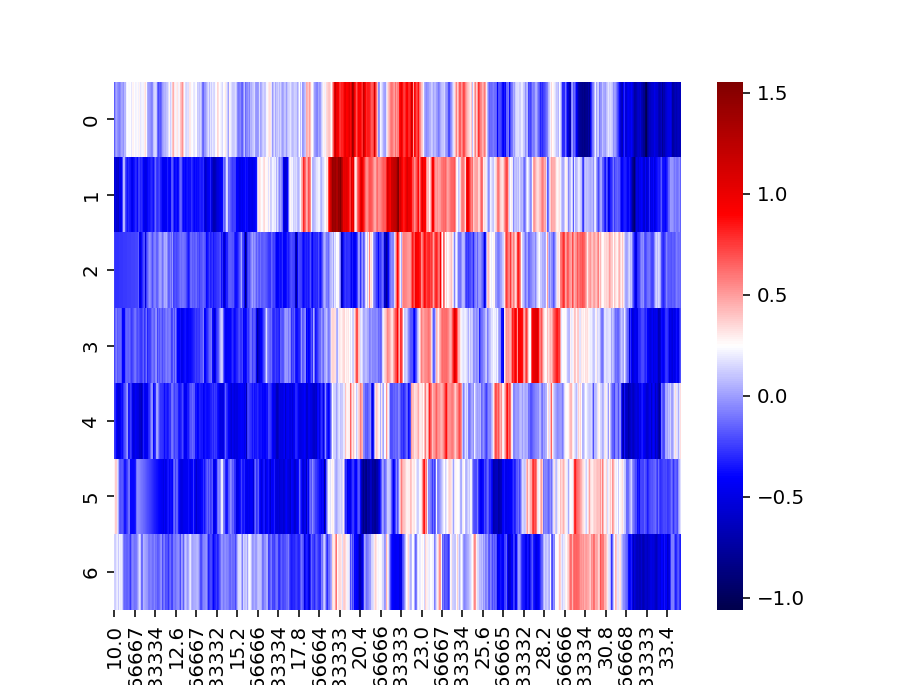

<AxesSubplot:>

In [50]:
import seaborn as sns

temperature_each_day = sub.get_days_df(10,'temp_rt_corrected')
motion_each_day = sub.get_days_df(10,'distance')
temperature_each_day.index = 10+(temperature_each_day.index/60)
motion_each_day.index = 10+(motion_each_day.index/60)
fig,ax = plt.subplots()
#ax.axhline(0,color='k',linestyle='--')
sns.heatmap( temperature_each_day.T, cmap='seismic')#, vmin=-1.5, vmax=1.5) #, color='b', alpha=.2)
#ax.plot( temperature_each_day.mean(axis=1), color='b', alpha=1 )
#plt.show()


In [ ]:
temp_component

<IPython.core.display.Javascript object>


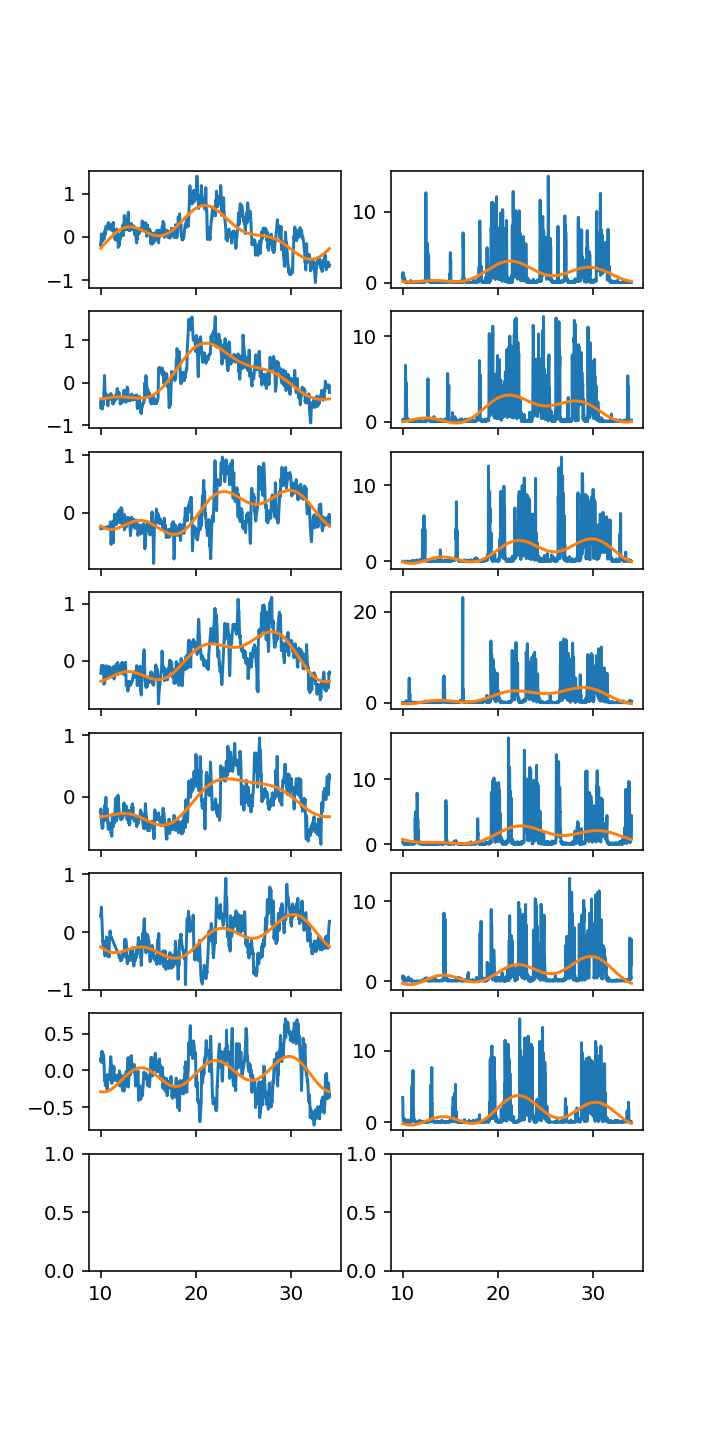

{'amplitude': [0.19136350866614926, 0.12497192063644674, 0.42029793375964186], 'period': [8.00999999998344, 12.009999999554813, 24.009999999973378], 'period_r': [8.0, 12.0, 24.0], 'acrophase': [4.549, 11.342, 20.152]}
{'amplitude': [0.5860124199636129, 0.6206471571492985, 0.9967815512004382], 'period': [8.009999999999998, 11.990000000000142, 23.990000000069376], 'period_r': [8.0, 12.0, 24.0], 'acrophase': [5.352, 7.929, 0.092]}
{'amplitude': [0.1268369975550367, 0.13784970987413345, 0.6109403286088024], 'period': [7.9900000001721, 12.009999999999634, 23.99000000179804], 'period_r': [8.0, 12.0, 24.0], 'acrophase': [4.252, 8.808, 22.656]}
{'amplitude': [0.6395867158676832, 0.2503351689831257, 1.3689521172318921], 'period': [7.990000000000808, 12.009999999675015, 23.990000000068513], 'period_r': [8.0, 12.0, 24.0], 'acrophase': [4.662, 8.331, 0.106]}
{'amplitude': [0.17647164765976397, 0.022603189086519884, 0.3190652938426533], 'period': [7.990000000000361, 12.00999999979011, 23.9900000000

In [51]:
fig,ax = plt.subplots(len(temperature_each_day.columns)+1,2,sharex=True,figsize=(5,10))

for i,d in enumerate(temperature_each_day.columns):
    cc_temp_day = Cosinor(temperature_each_day[d],temperature_each_day.index)
    temp_mesor, temp_component, temp_curve, temp_time = cc_temp_day.fitComponents([8,12,24],fixed=True)
    
    cc_mot_day = Cosinor(motion_each_day[d],temperature_each_day.index)
    temp_mesor, mot_component, mot_curve, mot_time = cc_mot_day.fitComponents([8,12,24],fixed=True)
    
    ax[i,0].plot(temp_time, temperature_each_day[d])
    ax[i,0].plot(temp_time,temp_curve)
    #ax[i,0].plot(temp_component['acrophase'],temp_component['mesor']+temp_component['amplitude'] ,'rs')
    
    ax[i,1].plot(mot_time, motion_each_day[d])
    ax[i,1].plot(mot_time,mot_curve)
    #ax[i,1].plot(mot_component['acrophase'],mot_component['mesor']+mot_component['amplitude'] ,'rs')
    

<IPython.core.display.Javascript object>


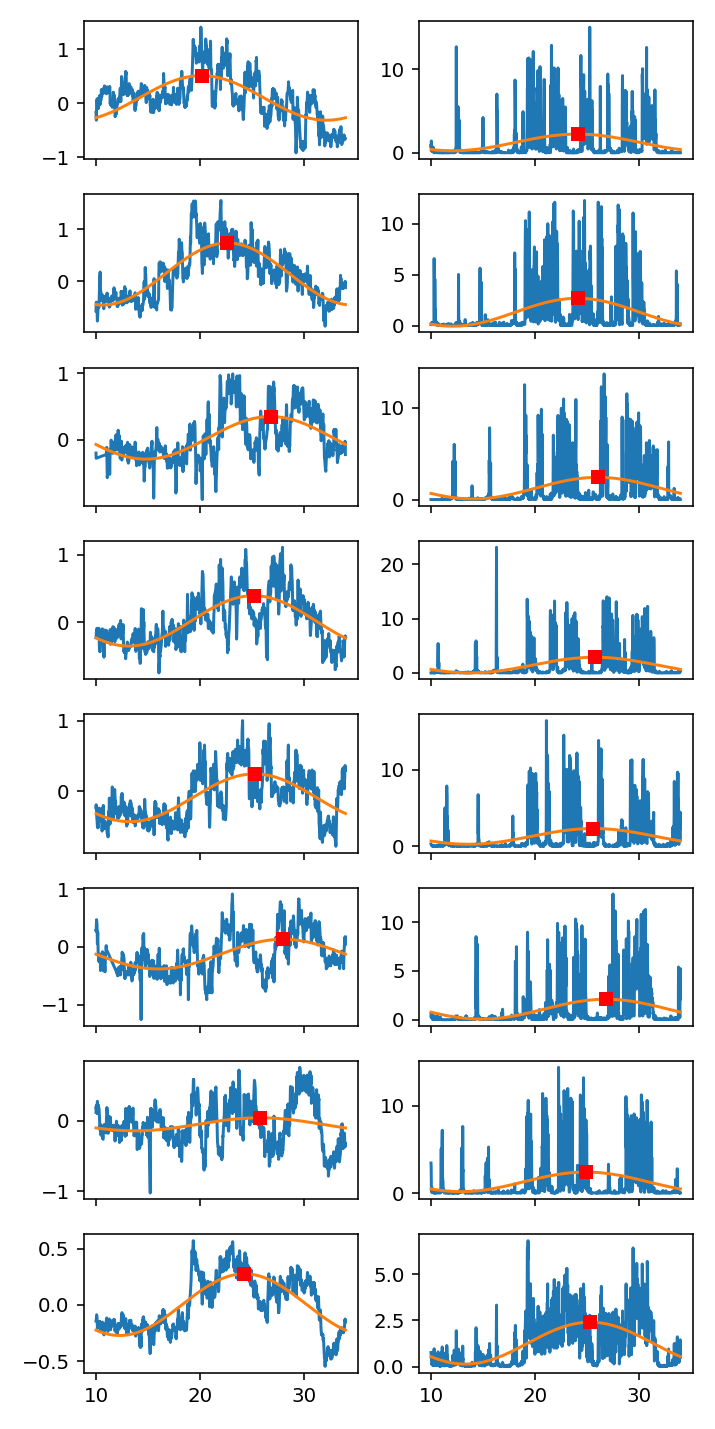

,mesor,amplitude,period,acrophase,r2
0,1.273888,1.130382,24.01,25.316,0.358638


In [8]:
fig,ax = plt.subplots(len(temperature_each_day.columns)+1,2,sharex=True,figsize=(5,10))

for i,d in enumerate(temperature_each_day.columns):
    cc_temp_day = Cosinor(temperature_each_day[d],temperature_each_day.index)
    cc_temp_day.fitComponent(24,fixed=True)
    
    cc_mot_day = Cosinor(motion_each_day[d],motion_each_day.index)
    cc_mot_day.fitComponent(24,fixed=True)
    
    ax[i,0].plot(cc_temp_day.time, temperature_each_day[d])
    ax[i,0].plot(cc_temp_day.time,cc_temp_day.curve)
    ax[i,0].plot(cc_temp_day.components['acrophase'],cc_temp_day.components['mesor']+cc_temp_day.components['amplitude'] ,'rs')
    
    ax[i,1].plot(cc_mot_day.time, motion_each_day[d])
    ax[i,1].plot(cc_mot_day.time,cc_mot_day.curve)
    ax[i,1].plot(cc_mot_day.components['acrophase'],cc_mot_day.components['mesor']+cc_mot_day.components['amplitude'] ,'rs')

cc_temp_day = Cosinor(temperature_each_day.mean(axis=1),temperature_each_day.index)
ax[i+1,0].plot(cc_temp_day.time, temperature_each_day.mean(axis=1))
ax[i+1,0].plot(cc_temp_day.time,cc_temp_day.curve)
ax[i+1,0].plot(cc_temp_day.components['acrophase'],cc_temp_day.components['mesor']+cc_temp_day.components['amplitude'] ,'rs')

cc_mot_day = Cosinor(motion_each_day.mean(axis=1),motion_each_day.index)
ax[i+1,1].plot(cc_mot_day.time, motion_each_day.mean(axis=1))
ax[i+1,1].plot(cc_mot_day.time,cc_mot_day.curve)
ax[i+1,1].plot(cc_mot_day.components['acrophase'],cc_mot_day.components['mesor']+cc_mot_day.components['amplitude'] ,'rs')

plt.tight_layout()
cc_mot_day.components

## Average 24h activity

In [6]:

# motion & temperature
isDay = list()
temperature = dict()
motion = dict()
for info,rec in tqdm( sub.iter_day_avg() , total=len(sub) ):
    rec = rec.sort_values(by='minute').reset_index(drop=True)
    motion[(info['geno'], info['id'])] = rec['distance']
    temperature[(info['geno'], info['id'])] = rec['temp_rt_corrected']
    isDay.append(rec['isDay'])
    
isDay = pd.concat(isDay,axis=1).mean(axis=1)
motion = pd.DataFrame.from_dict(motion)
temperature = pd.DataFrame.from_dict(temperature,)
#time_range = pd.timedelta_range(start='0 days 10:00:00', end='1 days 09:59:00', freq='1min')





100%|██████████| 16/16 [03:30<00:00, 13.17s/it]


<IPython.core.display.Javascript object>


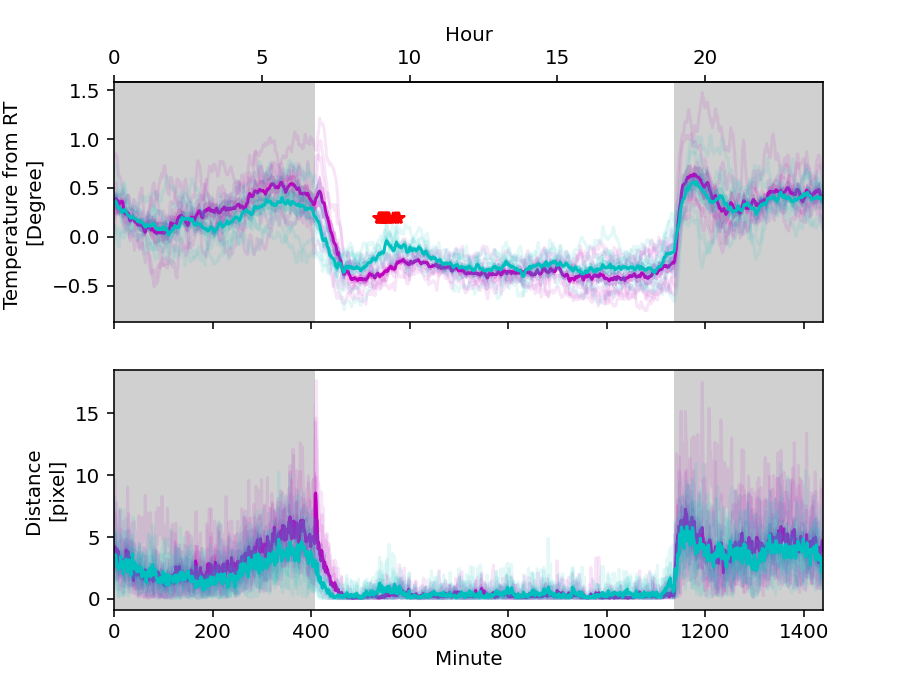

In [7]:
fig,ax = plt.subplots(2,1,sharex=True) 
plot_avg( temperature.xs('KO',level=0,axis=1), isDay,color='m',ax=ax[0])
plot_avg( temperature.xs('WT',level=0,axis=1), isDay,color='c',ax=ax[0])
ax[0].set_ylabel('Temperature from RT \n[Degree]')
ax2 = ax[0].secondary_xaxis("top", functions=(lambda x: x/60, lambda x: x*60))
ax2.set_xlabel('Hour')

plot_avg( motion.xs('KO',level=0,axis=1), isDay,color='m', ax=ax[1])
plot_avg( motion.xs('WT',level=0,axis=1), isDay,color='c', ax=ax[1])
ax[1].set_ylabel('Distance \n[pixel]')
ax[1].set_xlabel('Minute')

temperature_ttests = list()
for i,row in temperature.iterrows():
    temp = pg.ttest(row['WT'].values,row['KO'].values)
    temp['minute'] = i
    temperature_ttests.append( temp )
temperature_ttests = pd.concat(temperature_ttests).sort_values(by='p-val')    
reject, pvals_corr = pg.multicomp(temperature_ttests['p-val'], method='fdr_bh')
temperature_ttests['p-corr'] = pvals_corr

pval_signi = temperature_ttests[temperature_ttests['p-corr']<0.05]
signi_pos = temperature.loc[pval_signi.minute].max(axis=1).max()*1.5
ax[0].plot( pval_signi.minute, np.repeat(signi_pos,len(pval_signi)),'*r' )

motion_ttests = list()
for i,row in motion.iterrows():
    temp = pg.ttest(row['WT'].values,row['KO'].values)
    temp['minute'] = i
    motion_ttests.append( temp )
motion_ttests = pd.concat(motion_ttests).sort_values(by='p-val')    
reject, pvals_corr = pg.multicomp(motion_ttests['p-val'], method='fdr_bh')
motion_ttests['p-corr'] = pvals_corr

pval_signi = motion_ttests[motion_ttests['p-corr']<0.05]
signi_pos = motion.loc[pval_signi.minute].max(axis=1).max()*1.5
ax[1].plot( pval_signi.minute, np.repeat(signi_pos,len(pval_signi)),'*r' )


In [8]:
isDay = list()
temperature = dict()
motion = dict()
for info,rec in tqdm( sub.iter_data() , total=len(sub) ):
    #rec = rec.sort_values(by='minute').reset_index(drop=True)
    motion[(info['geno'], info['id'])] = rec['distance']
    temperature[(info['geno'], info['id'])] = rec['temp_rt_diff']
    isDay.append(rec['isDay'])

isDay = pd.concat(isDay,axis=1).mean(axis=1)
motion = pd.DataFrame.from_dict(motion)
temperature = pd.DataFrame.from_dict(temperature,)

100%|██████████| 16/16 [00:00<00:00, 39.11it/s]


<IPython.core.display.Javascript object>


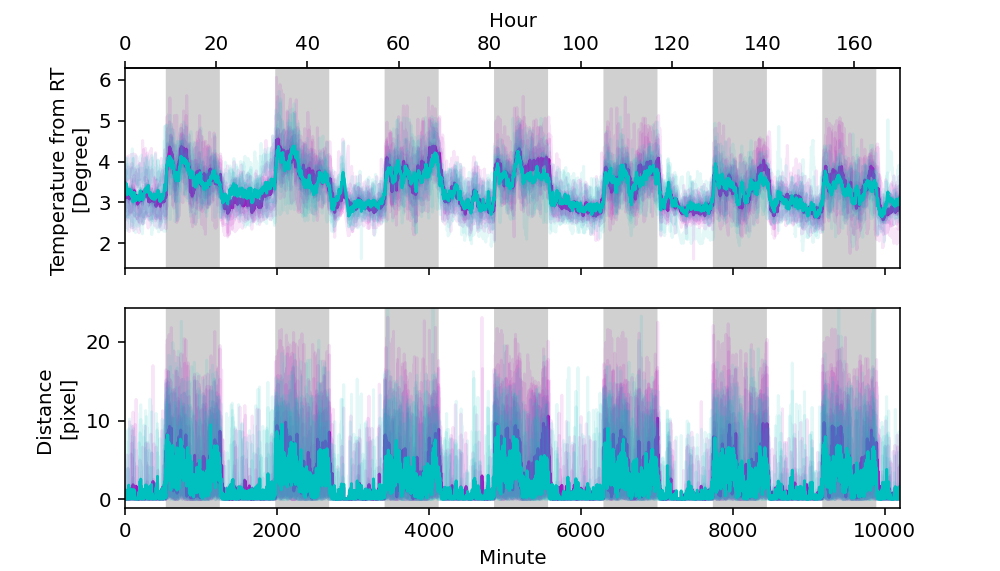

Text(0.5, 0, 'Minute')

In [9]:
fig,ax = plt.subplots(2,1,sharex=True, figsize=(7,4)) 
plot_avg( temperature.xs('KO',level=0,axis=1), isDay,color='m',ax=ax[0])
plot_avg( temperature.xs('WT',level=0,axis=1), isDay,color='c',ax=ax[0])
ax[0].set_ylabel('Temperature from RT \n[Degree]')
ax2 = ax[0].secondary_xaxis("top", functions=(lambda x: x/60, lambda x: x*60))
ax2.set_xlabel('Hour')

plot_avg( motion.xs('KO',level=0,axis=1), isDay,color='m', ax=ax[1])
plot_avg( motion.xs('WT',level=0,axis=1), isDay,color='c', ax=ax[1])
ax[1].set_ylabel('Distance \n[pixel]')
ax[1].set_xlabel('Minute')

In [10]:
temperature

WT                            KO                            WT  \
          WT_74     WT_91     WT_97     KO_70     KO_72     KO_99     WT_86   
0      3.268596  3.696209  2.821120  2.986998  3.661139  3.914094  3.288229   
1      3.276870  3.704289  2.841546  3.014151  3.728878  3.816394  3.261126   
2      3.314955  3.738027  2.927371  3.004214  3.802757  3.820027  3.137709   
3      3.383058  3.665661  2.986429  2.817987  3.800190  3.809996  3.001368   
4      3.430088  3.702073  3.015008  2.631760  3.786201  3.792922  2.866216   
...         ...       ...       ...       ...       ...       ...       ...   
10196  2.780097  2.806622  2.664195  2.676542  3.270073  2.679291  2.861339   
10197  2.809986  2.836206  2.560771  2.815471  3.292426  2.592818  2.856072   
10198  2.782133  2.845959  2.577494  2.940515  3.286702  2.527075  2.935922   
10199  2.695297  2.855709  2.594217  2.985660  3.192127  2.461331  2.987362   
10200  2.691408  2.799040  2.598561  2.983554  3.173845  2.546539  2.973119   

                       KO        WT        KO                            WT  \
          WT_83     KO_87     WT_79     KO_69   KO_1021     KO_77     WT_71   
0      3.371212  3.038108  3.758822  3.075742  2.519167  3.073002  3.557021   
1      3.232738  3.059189  3.793956  3.039879  2.532867  3.058205  3.689415   
2      3.092706  3.058339  3.814753  3.127935  2.541889  3.048893  3.827841   
3      3.031983  3.065454  3.833363  3.211013  2.537949  3.015752  3.864218   
4      2.996447  3.049088  3.858407  3.294091  2.535262  2.983967  3.772166   
...         ...       ...       ...       ...       ...       ...       ...   
10196  2.730610  2.808385  3.539345  2.980884  3.136414  2.957373  3.411924   
10197  2.699165  2.776305  3.471215  3.029604  3.063143  2.954887  3.452238   
10198  2.713533  2.785657  3.474131  3.019076  3.130077  2.969727  3.478527   
10199  2.648973  2.797100  3.481091  3.003938  3.119217  2.985875  3.500240   
10200  2.653379  2.805172  3.422658  3.001869  3.100265  3.002076  3.532022   

                       KO  
          WT_81     KO_75  
0      4.072969  3.237762  
1      4.004045  3.229569  
2      4.012131  3.236000  
3      3.928489  3.346398  
4      3.956127  3.456795  
...         ...       ...  
10196  3.053631  2.870473  
10197  2.992013  2.911444  
10198  3.010515  2.906919  
10199  3.021733  2.880697  
10200  3.019958  2.866155  

[10201 rows x 16 columns]

<IPython.core.display.Javascript object>


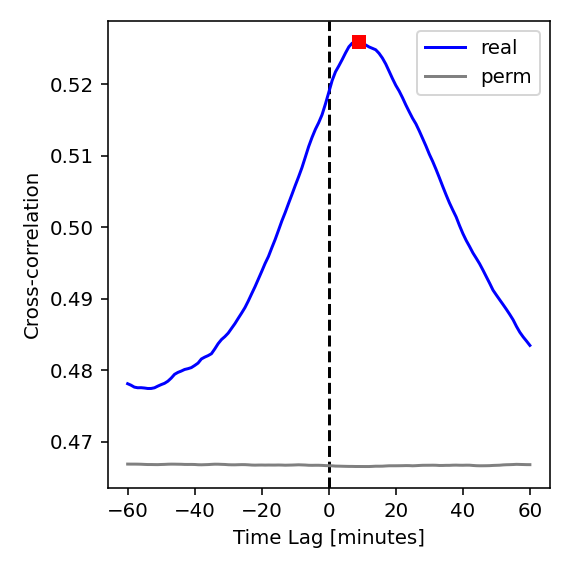

In [11]:

chi = 'WT_71'
cc = CrossCorrelation(temperature[chi.split('_')[0]][chi], motion[chi.split('_')[0]][chi],60)

#fig,ax = plt.subplots()
cc.plot() #ax=ax)
plt.tight_layout()

#ax.plot(cc.latencies ,cc.cross_correlation)
#ax.plot(cc.latencies ,cc.per_xcorr_avg)
#ax.axvline(0,color='k')
#ax.plot(cc.summary['latency_minute'],cc.summary['amplitude'],'sr')
#cc.summary

In [20]:
data_min = sub.get_data(2)
data_min

,minute,day,hour,RT,isDay,temp_avg,temp_med,temp_max,centroid_x,centroid_y,distance,temp_rt_diff,temp_norm,RT_norm,temp_rt_corrected
0,600,1,10.0,23.667338,1.0,26.488457,26.488457,28.220413,46.429724,102.730765,0.011712,2.821120,-0.480560,-0.190825,-0.289735
1,601,1,10.0,23.662258,1.0,26.503805,26.503805,28.295775,46.464495,102.686722,0.012507,2.841546,-0.465212,-0.195904,-0.269308
2,602,1,10.0,23.658631,1.0,26.586002,26.586002,28.462092,46.856004,103.906408,0.367163,2.927371,-0.383015,-0.199532,-0.183484
3,603,1,10.0,23.667917,1.0,26.654346,26.654346,28.450593,45.456659,104.198556,0.171405,2.986429,-0.314671,-0.190246,-0.124426
4,604,1,10.0,23.676263,1.0,26.691271,26.045719,27.489652,46.483584,104.623490,0.963706,3.015008,-0.277746,-0.181900,-0.095846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10196,716,8,11.0,24.149590,1.0,26.813785,26.677564,28.408766,24.128280,100.831306,0.129899,2.664195,-0.155232,0.291428,-0.446660
10197,717,8,11.0,24.153559,1.0,26.714329,26.714329,28.587837,23.892856,100.757874,0.114616,2.560771,-0.254688,0.295397,-0.550084
10198,718,8,11.0,24.136835,1.0,26.714329,26.455128,28.156701,25.594845,100.200460,1.967027,2.577494,-0.254688,0.278673,-0.533361
10199,719,8,11.0,24.120112,1.0,26.714329,26.570384,28.466030,23.603674,97.923190,1.683153,2.594217,-0.254688,0.261950,-0.516637


In [46]:

cos = Cosinor(data_min['temp_rt_diff'], 10+(data_min.index/60),fs=60)
cos.components

,mesor,amplitude,period,acrophase,r2
0,3.270822,0.501895,24.01,121.881,0.413444


<IPython.core.display.Javascript object>


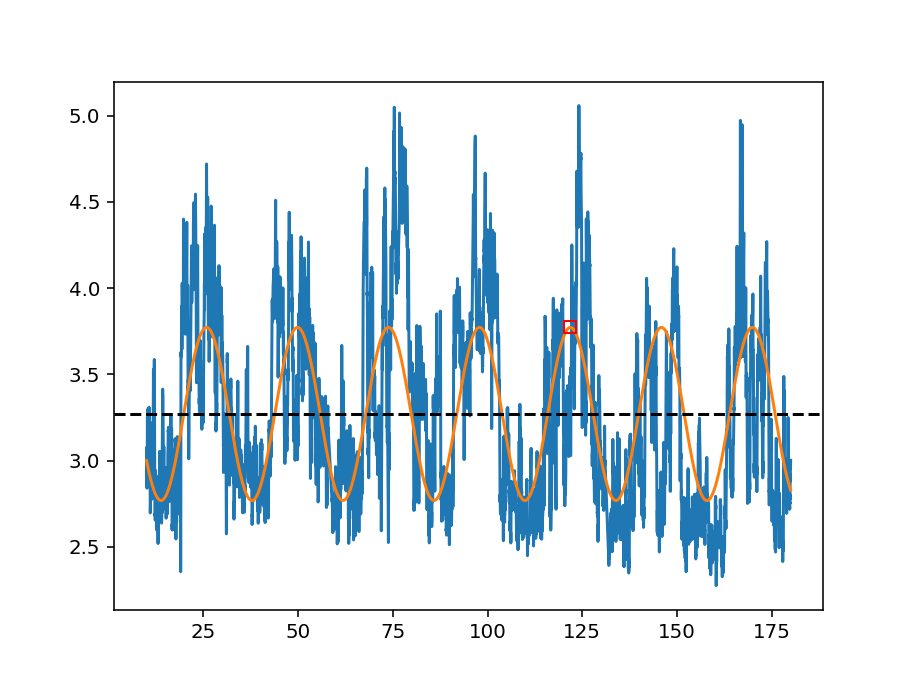

In [47]:

fig,ax = plt.subplots()
ax.plot(10+(data_min.index/60), data_min['temp_rt_diff'])
ax.plot(cos.time, cos.curve)
ax.axhline(cos.components['mesor'].values[0],color='k',linestyle='--')
ax.plot(cos.components['acrophase'].values[0], cos.components['mesor'].values[0] + cos.components['amplitude'].values[0], 'sr', markerfacecolor='None')



<IPython.core.display.Javascript object>


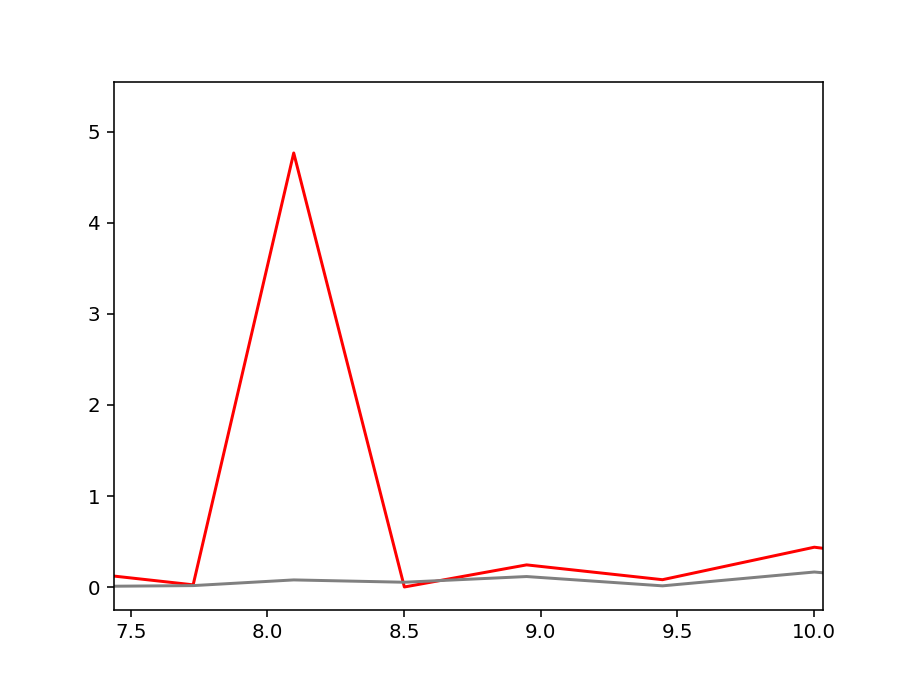

,period,period_r,psd,amplitude
0,24.288095,24.0,1.132155,1.064028


In [45]:

perg_RT = Periodogram(data_min['RT'],fs=60)
perg_Temp = Periodogram(data_min['temp_avg'],fs=60)

fig,ax = plt.subplots()
ax.plot(perg_Temp.period, perg_Temp.power_spectrum,'r')
ax.plot(perg_RT.period, perg_RT.power_spectrum,'gray')
perg.peaks_signi

array([ 0.        ,  0.48484848,  0.96969697,  1.45454545,  1.93939394,
        2.42424242,  2.90909091,  3.39393939,  3.87878788,  4.36363636,
        4.84848485,  5.33333333,  5.81818182,  6.3030303 ,  6.78787879,
        7.27272727,  7.75757576,  8.24242424,  8.72727273,  9.21212121,
        9.6969697 , 10.18181818, 10.66666667, 11.15151515, 11.63636364,
       12.12121212, 12.60606061, 13.09090909, 13.57575758, 14.06060606,
       14.54545455, 15.03030303, 15.51515152, 16.        , 16.48484848,
       16.96969697, 17.45454545, 17.93939394, 18.42424242, 18.90909091,
       19.39393939, 19.87878788, 20.36363636, 20.84848485, 21.33333333,
       21.81818182, 22.3030303 , 22.78787879, 23.27272727, 23.75757576,
       24.24242424, 24.72727273, 25.21212121, 25.6969697 , 26.18181818,
       26.66666667, 27.15151515, 27.63636364, 28.12121212, 28.60606061,
       29.09090909, 29.57575758, 30.06060606, 30.54545455, 31.03030303,
       31.51515152, 32.        , 32.48484848, 32.96969697, 33.45